# Logistic Regression with TF
Implemented as a partial solution to exercise in chapter 9 of Aurélien Géron's book, [Hands-On Machine Learning with Scikit-Learn and TensorFlow](http://shop.oreilly.com/product/0636920052289.do)

In [1]:
import tensorflow as tf
from sklearn.datasets import make_moons
import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Load data using scikit learn's ["moons" toy dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons)

In [3]:
X_raw, y_raw = make_moons(n_samples=250, noise=0.1)

store shape of samples

In [4]:
m, n = X_raw.shape

### Plot data

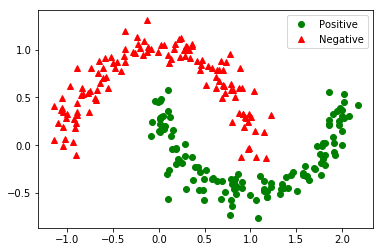

In [5]:
plt.plot(X_raw[y_raw == 1, 0], X_raw[y_raw == 1, 1], 'go', label="Positive")
plt.plot(X_raw[y_raw == 0, 0], X_raw[y_raw == 0, 1], 'r^', label="Negative")
plt.legend()



Add a constant to the input data

In [6]:
X_plus_const = np.c_[np.ones((m, 1)), X_raw]

Logistic regression implementation

In [22]:
n_epochs = 1000
eta = 0.01

X = tf.constant(X_plus_const, dtype=tf.float32, name='X')
y = tf.constant(y_raw.reshape(-1,1), dtype= tf.float32, name='y')

theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name="theta")
z = tf.matmul(X, theta, name='z')
p_hat = tf.sigmoid(z, 'y_pred')

# log loss function, computed across all samples
loss = -tf.reduce_mean(y * tf.log(p_hat) + (1-y) * tf.log(1-p_hat))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=eta)
training_op = optimizer.minimize(loss)

Run regression using gradient descent

In [26]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "Cost =", loss.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()
    p_hat_vec = p_hat.eval()

('Epoch', 0, 'Cost =', 0.59237146)
('Epoch', 100, 'Cost =', 0.53399628)
('Epoch', 200, 'Cost =', 0.49067658)
('Epoch', 300, 'Cost =', 0.45805612)
('Epoch', 400, 'Cost =', 0.43305239)
('Epoch', 500, 'Cost =', 0.41352621)
('Epoch', 600, 'Cost =', 0.39799726)
('Epoch', 700, 'Cost =', 0.38543347)
('Epoch', 800, 'Cost =', 0.37510633)
('Epoch', 900, 'Cost =', 0.36649394)
